# Resources

Dalam notebook:
- https://medium.economist.com/mistakes-weve-drawn-a-few-8cdd8a42d368
- https://chezvoila.com/blog/yaxis/


Lainnya:
- https://handsondataviz.org/how-to-lie-with-charts.html

# Library

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [579]:
plt.style.use('seaborn-white')

# Case 1 - Misleading Charts

- Kasus pertama adalah salah satu hal terburuk yang bisa terjadi dalam visualisasi data: menampilkan data dengan cara yang misleading.


- Meskipun mungkin dilakukan dengan tidak sengaja, hal ini bisa terjadi pada siapapun.

## Truncating the scale

- Chart di bawah menampilkan angka rerata _likes_ di Facebook dari akun-akun politik sayap kiri di Inggris.


- Inti dari chart adalah untuk menampilkan disparitas antara akun Jeremy Corbyn dengan akun lain.


- Chart original meremehkan angka dari akun Corbyn dan juga melebih-lebihkan angka dari akun lain.


- Selain itu, pemilihan warna juga sedikit aneh karena memakai 3 jenis warna antara jingga dan merah untuk membedakan Corbyn dengan yang lain, tanpa ada penjelasan di dalam artikel.

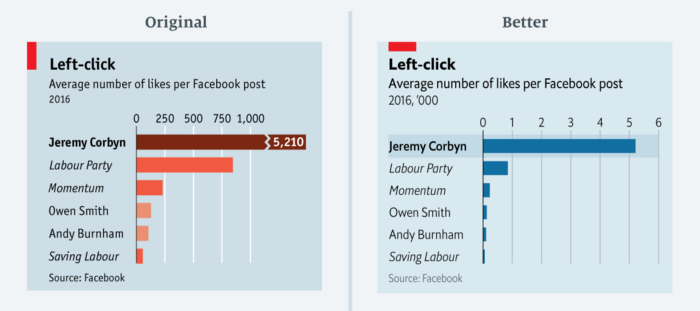

In [26]:
df_corbyn = pd.read_csv(r"data/Economist_corbyn.csv")
print(df_corbyn.shape)
df_corbyn

(8, 2)


,Page,Average number of likes per Facebook post 2016
0,Jeremy Corbyn,5210.0
1,Labour Party,845.0
2,Momentum,229.0
3,Owen Smith,127.0
4,Andy Burnham,105.0
5,Saving Labour,56.0
6,NaN,NaN
7,Source: Facebook,NaN


In [73]:
# Get only the data of interest
df_corbyn = df_corbyn.loc[0:5]

# Divide the number of post by 1,000
df_corbyn.iloc[:,1] = df_corbyn.iloc[:,1] / 1000

df_corbyn

,Page,Average number of likes per Facebook post 2016
0,Jeremy Corbyn,5.210
1,Labour Party,0.845
2,Momentum,0.229
3,Owen Smith,0.127
4,Andy Burnham,0.105
5,Saving Labour,0.056


In [128]:
sns.set_style({"font.sans-serif": "Geneva", "axes.facecolor": "white"})

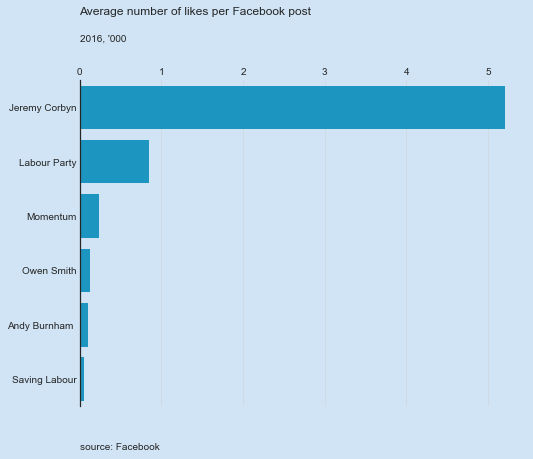

In [728]:
fig, ax = plt.subplots(figsize=(8,6))

fig.patch.set_facecolor('#187bcd')
fig.patch.set_alpha(0.2)

ax.patch.set_facecolor(None)
ax.patch.set_alpha(0)

sns.barplot(data = df_corbyn,
            y = 'Page',
            x = 'Average number of likes per Facebook post 2016',
            color='#00a4dc',
            zorder=2
           )

sns.despine(left=False, bottom=True, right=True, top=True)

plt.xlabel('')
plt.ylabel('')

ax.xaxis.tick_top()

plt.suptitle("Average number of likes per Facebook post",x=0.325, y=1.05)
plt.title("2016, '000", loc="left", size=10, y=1.1)

plt.grid(axis='x', alpha=0.5, zorder=0)

plt.text(0,6.3,'source: Facebook')

plt.show()

## Forcing a relationship by cherry-picking scales

- Chart di bawah menceritakan narasi cerita penurunan berat badan anjing.


- Sekilas terlihat ada korelasi yang sangat dekat antara berat badan dan ukuran lingkar leher.


- Di chart oiriginal, kedua skala berkurang sebanyak 3 unit (dari 21 ke 18 dan dari 45 ke 42).


- Namun, secara persentase, skala sebelah kiri berkurang 14% dan sebelah kanan hanya berkurang 7%.

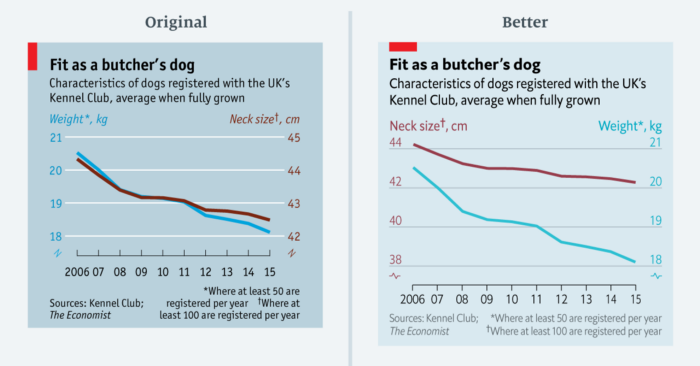

In [223]:
df_dogs = pd.read_csv(r"data/Economist_dogs.csv")
print(df_dogs.shape)
df_dogs

(16, 3)


,Year,Average weight kg,Average neck size cm
0,2006,20.52438868,44.332169
1,2007,20.00247895,43.845777
2,2008,19.40455933,43.392293
3,2009,19.1934209,43.166005
4,2010,19.13996078,43.156878
5,2011,19.03129151,43.065685
6,2012,18.62197416,42.785919
7,2013,18.50557843,42.754372
8,2014,18.37729864,42.664532
9,2015,18.11123635,42.482618


In [224]:
# Get only the data of interest
df_dogs = df_dogs.loc[0:9]

df_dogs

,Year,Average weight kg,Average neck size cm
0,2006,20.52438868,44.332169
1,2007,20.00247895,43.845777
2,2008,19.40455933,43.392293
3,2009,19.1934209,43.166005
4,2010,19.13996078,43.156878
5,2011,19.03129151,43.065685
6,2012,18.62197416,42.785919
7,2013,18.50557843,42.754372
8,2014,18.37729864,42.664532
9,2015,18.11123635,42.482618


In [225]:
# Check dtypes
df_dogs.dtypes

Year                     object
Average weight kg        object
Average neck size cm    float64
dtype: object

In [226]:
df_dogs = df_dogs.astype({"Average weight kg":"float64"})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator


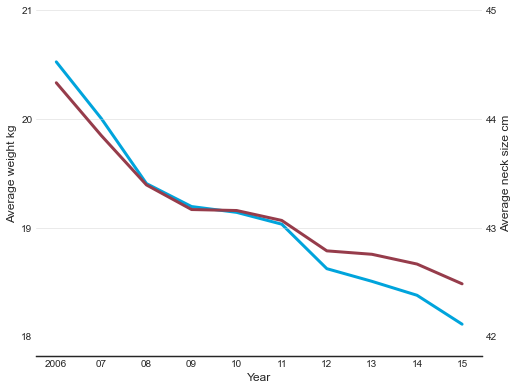

In [747]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(data=df_dogs,
            x='Year',
             y='Average weight kg',
             color='#00a4dc',
             linewidth=3,
             zorder=2
            )

ax2 = ax.twinx()

sns.lineplot(data=df_dogs,
            x='Year',
             y='Average neck size cm',
             ax=ax2,
             color='#963c4b',
             linewidth=3,
             zorder=2
            )

ax.set_ylim([18, 21])
ax.set_yticks([18,19,20,21])

ax2.set_ylim([42, 45])
ax2.set_yticks([42, 43, 44, 45])

ax.set_xticklabels(['2006', '07', '08', '09', '10', '11', '12', '13', '14', '15'])

sns.despine(left=True, bottom=False, right=True, top=True, offset=20)

plt.grid(alpha=0.5, zorder=0)

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


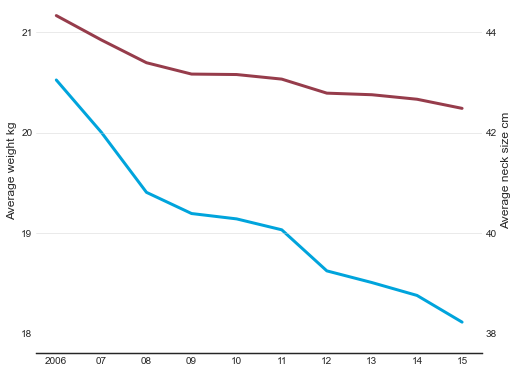

In [756]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(data=df_dogs,
            x='Year',
             y='Average weight kg',
             color='#00a4dc',
             linewidth=3
            )

ax2 = ax.twinx()

sns.lineplot(data=df_dogs,
            x='Year',
             y='Average neck size cm',
             ax=ax2,
             color='#963c4b',
             linewidth=3
            )

ax.set_ylim([18, 21.25])
ax.set_yticks([18,19,20,21])

ax2.set_ylim([38, 44.5])
ax2.set_yticks([38, 40, 42, 44])

ax.set_xticklabels(['2006', '07', '08', '09', '10', '11', '12', '13', '14', '15'])

ax.set_xlabel('')
# ax2.set_xlabel('')

sns.despine(left=True, bottom=False, right=True, top=True, offset=20)

plt.grid(alpha=0.5, zorder=0)

plt.show()

## Choosing the wrong visualisation method


- Grafik di bawah menunjukkan sikap warga UK terhadap referendum Uni Eropa yang digambarkan dengan line chart. 


- Line chart pada data ini (diambil mingguan) seakan-akan memperlihatkan bahwa opini masyarakat berubah secara eratik.


- Skala dalam grafik ini juga bisa diperbaiki karena data disebar terlalu lebar.


- Salah satu cara memperbaiki skala adalah menambahkan ruang sedikitnya 33% di antara awal skala dan data terkecil, untuk skala yang tidak mulai dari 0.
[Referensi dari Francis Gagnon](https://chezvoila.com/blog/yaxis/)

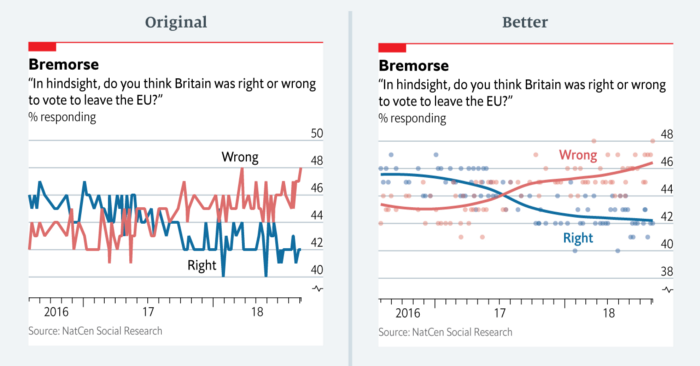

In [18]:
df_brexit = pd.read_csv(r"data/Economist_brexit.csv")
print(df_brexit.shape)
df_brexit.head(10)

(88, 3)


,"Question: In hindsight, do you think Britain was right or wrong to vote to leave the EU?",Unnamed: 1,Unnamed: 2
0,Source: NatCen Social Research,NaN,NaN
1,NaN,NaN,NaN
2,Date,% responding right,% responding wrong
3,02/08/16,46,42
4,09/08/16,45,44
5,17/08/16,46,43
6,23/08/16,45,43
7,31/08/16,47,44
8,14/09/16,46,43
9,12/10/16,45,44


In [240]:
df_brexit = pd.read_csv(r"data/Economist_brexit.csv", skiprows=3)
print(df_brexit.shape)
df_brexit.head(10)

(85, 3)


,Date,% responding right,% responding wrong
0,02/08/16,46,42
1,09/08/16,45,44
2,17/08/16,46,43
3,23/08/16,45,43
4,31/08/16,47,44
5,14/09/16,46,43
6,12/10/16,45,44
7,20/10/16,45,44
8,15/11/16,46,43
9,29/11/16,44,45


In [241]:
df_brexit.dtypes

Date                  object
% responding right     int64
% responding wrong     int64
dtype: object

In [242]:
df_brexit = df_brexit.astype({'Date':'datetime64'})
# df_brexit['Date'] = pd.to_datetime(df_brexit['Date'], format='%d/%m/%y')
df_brexit.dtypes

Date                  datetime64[ns]
% responding right             int64
% responding wrong             int64
dtype: object

In [243]:
df_brexit.head()

,Date,% responding right,% responding wrong
0,2016-02-08,46,42
1,2016-09-08,45,44
2,2016-08-17,46,43
3,2016-08-23,45,43
4,2016-08-31,47,44


In [292]:
df_brexit['date_ord'] = df_brexit['Date'].apply(lambda x:x.toordinal())

In [293]:
df_brexit.head()

,Date,% responding right,% responding wrong,date_ord,date_str
0,2016-02-08,46,42,736002,2016-02-08
1,2016-09-08,45,44,736215,2016-09-08
2,2016-08-17,46,43,736193,2016-08-17
3,2016-08-23,45,43,736199,2016-08-23
4,2016-08-31,47,44,736207,2016-08-31


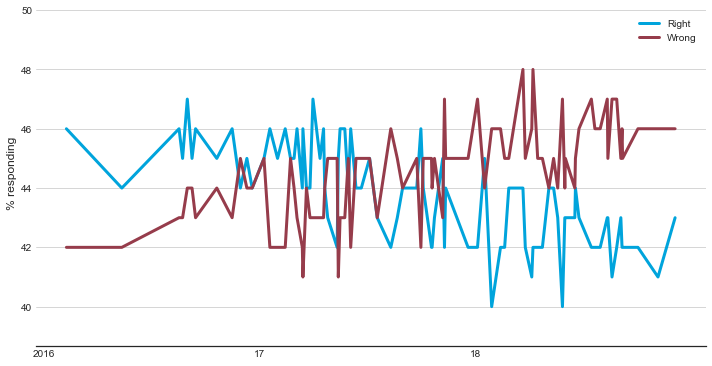

In [758]:
fig, ax = plt.subplots(figsize=(12,6))


sns.lineplot(data=df_brexit,
             x='Date',
             y='% responding right',
             color= '#00a4dc',
             linewidth=3,
             label = 'Right'
            )

sns.lineplot(data=df_brexit,
             x='Date',
             y='% responding wrong',
             color='#963c4b',
             linewidth=3,
             label = 'Wrong'
            )

plt.ylim([39,50])

date_list = ['2016-01-01', '2017-01-01', '2018-01-01']

plt.xticks(date_list)

ax.set_xticklabels(['2016', '17', '18'])

plt.xlabel('')
plt.ylabel('% responding')

plt.grid(axis='y')

sns.despine(left=True, bottom=False, right=True, top=True, offset=10)


plt.legend()

plt.show()

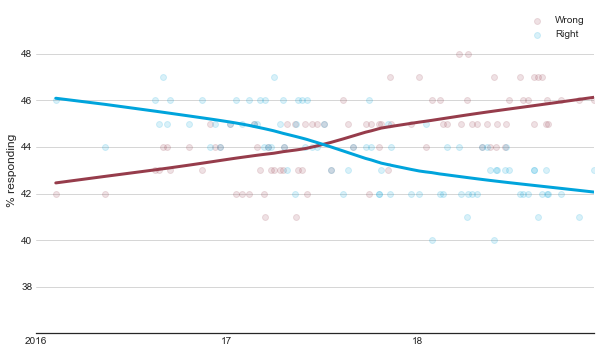

In [760]:
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(data=df_brexit,
            x='date_ord',
            y='% responding wrong',
            color='#963c4b',
            lowess=True,
            scatter_kws={'alpha':0.15, 'color': '#963c4b'}, 
            line_kws={'color': '#963c4b', 'linewidth':3},
            label='Wrong',
            ax=ax
            )

sns.regplot(data=df_brexit,
            x='date_ord',
            y='% responding right',
            color='#00a4dc',
            lowess=True,
            scatter_kws={'alpha':0.15, 'color': '#00a4dc'}, 
            line_kws={'color': '#00a4dc', 'linewidth':3},
            ax=ax,
            label='Right'
            )


date_list = ['2016-01-01', '2017-01-01', '2018-01-01']
x_ticks = [datetime.strptime(x, '%Y-%m-%d').toordinal() for x in date_list]

plt.xticks(x_ticks)
plt.yticks(np.arange(38, 50, 2))

ax.set_ylim([36, 50])

ax.set_xticklabels(['2016', '17', '18'])

plt.xlabel('')
plt.ylabel('% responding')

plt.grid(axis='y')

sns.despine(left=True, bottom=False, right=True, top=True)

plt.legend()

plt.show()

# Case 2 - Confusing Charts


- Visualisasi yang baik adalah yang tidak sulit untuk dibaca. Jika pembaca menjadi kesulitan utnuk mengerti ini dari narasi yang digambarkan, artinya ada hal yang harus diperbaiki.

## Taking the “mind-stretch” a little too far


- Chart di bawah menunjukkan defisit dagang di US dalam barang ( _trade deficit_ ) dan employment manufaktur ( _manufacturing employment_ ).


- Masalah pertama pada grafik di bawah adalah data defisit dagang sepenuhnya negatif dan data employment manufaktur sepenuhnya positif.


- Masalah kedua datang dari pemaksaan visualisasi kedua data dalam satu chart: kedua data tidak ada _common baseline_.


- Baseline untuk defisit dagang ada di atas grafik (nilai 0 di kiri atas), dan baseline untuk employment manufaktur ada di bawah grafik (nilai 0 di kanan bawah).

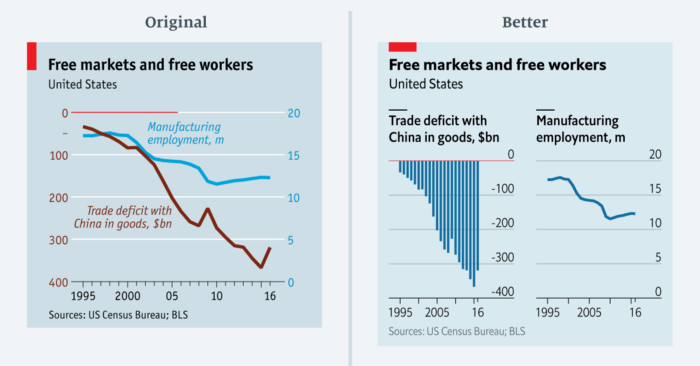

In [21]:
df_trade = pd.read_csv(r"data/Economist_us-trade-manufacturing.csv")
print(df_trade.shape)
df_trade

(24, 3)


,Year,"Trade deficit with China in goods, $bn","Manufacturing employment, m"
0,1995,-33.789500,17.244583
1,1996,-39.520200,17.236750
2,1997,-49.695500,17.417833
3,1998,-56.927400,17.560000
4,1999,-68.677100,17.322667
5,2000,-83.833000,17.265250
6,2001,-83.096100,16.440583
7,2002,-103.064900,15.256833
8,2003,-124.068154,14.508500
9,2004,-162.254262,14.314750


In [375]:
# Get only the data of interest
df_trade = df_trade.loc[0:21]
df_trade

,Year,"Trade deficit with China in goods, $bn","Manufacturing employment, m"
0,1995,-33.789500,17.244583
1,1996,-39.520200,17.236750
2,1997,-49.695500,17.417833
3,1998,-56.927400,17.560000
4,1999,-68.677100,17.322667
5,2000,-83.833000,17.265250
6,2001,-83.096100,16.440583
7,2002,-103.064900,15.256833
8,2003,-124.068154,14.508500
9,2004,-162.254262,14.314750


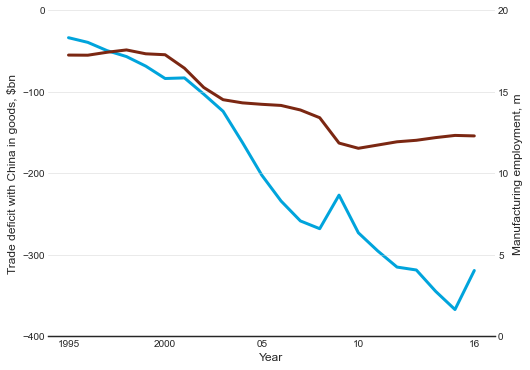

In [762]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(data=df_trade,
            x='Year',
             y='Trade deficit with China in goods, $bn',
             color='#00a4dc',
             linewidth = 3,
             zorder=2
            )

ax2 = ax.twinx()

sns.lineplot(data=df_trade,
            x='Year',
             y='Manufacturing employment, m',
             ax=ax2,
             color='#7b2712',
             linewidth = 3,
             zorder=2
            )

ax.set_ylim([-400, 0])
ax.set_yticks(np.arange(-400, 100, 100))

ax2.set_ylim([0, 20])
ax2.set_yticks(np.arange(0, 25, 5))

ax.set_xticks(['1995', '2000', '2005', '2010', '2016'])
ax.set_xticklabels(['1995', '2000', '05', '10', '16'])

sns.despine(left=True, bottom=False, right=True, top=True)

plt.grid(alpha=0.5, zorder=0)

plt.show()

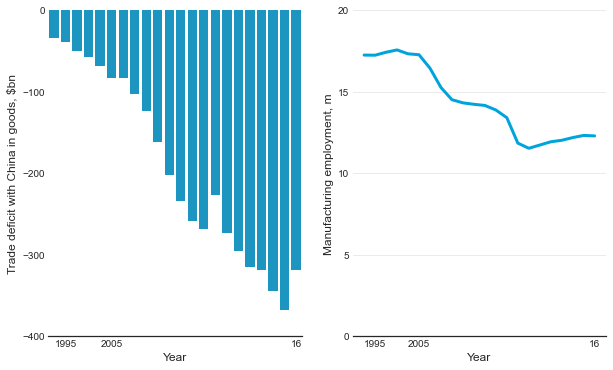

In [680]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))

sns.barplot(data=df_trade,
            x='Year',
            y='Trade deficit with China in goods, $bn',
            color='#00a4dc',
            zorder=2,
            ax=ax[0]
            )

ax[0].set_ylim([-400, 0])
ax[0].set_yticks(np.arange(-400, 100, 100))

ax[0].set_xticks([1, 5, 21])
ax[0].set_xticklabels(['1995', '2005', '16'])



sns.lineplot(data=df_trade,
             x='Year',
             y='Manufacturing employment, m',
             ax=ax[1],
             color='#00a4dc',
             linewidth=3,
             zorder=2
            )

ax[1].set_ylim([0, 20])
ax[1].set_yticks(np.arange(0, 25, 5))

ax[1].set_xticks([1, 5, 21])
ax[1].set_xticklabels(['1995', '2005', '16'])


sns.despine(left=True, bottom=False, right=True, top=True)

plt.grid(axis='y', alpha=0.5, zorder=1)

plt.show()

## Confusing use of colour

- Chart di bawah membandingkan pengeluaran pemerintah untuk program pensiun dan persentase orang berumur 65+ tahun di negara-negara pilihan.


- Untuk menyederhanakan chart, hanya beberapa negara yang diberi label dan di-highlight.


- Warna yang berbeda dapat menjadi misleading karena bisa memberikan kesan bahwa warna yang berbeda menunjukkan kategori yang berbeda.

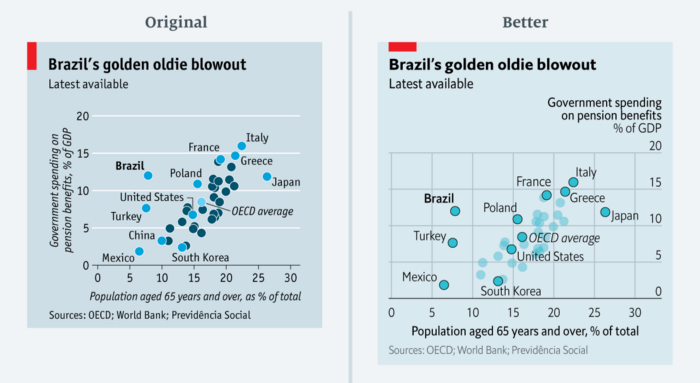

In [732]:
df_pension = pd.read_csv(r"data/Economist_pensions.csv")
print(df_pension.shape)
df_pension

(38, 3)


,Country,"Population aged 65 years and over, as % of total","Government spending on pension benefits, % of GDP"
0,Australia,15.04,5.20
1,Austria,18.76,13.86
2,Belgium,18.22,10.36
3,Brazil,7.84,12.00
4,Canada,16.14,4.31
5,Chile,11.00,3.25
6,Czech Republic,18.08,9.09
7,Denmark,18.96,8.45
8,Estonia,18.76,6.99
9,Finland,20.48,11.45


In [733]:
country_of_interest = ['Mexico', 'China', 'Turkey', 
                       'United States', 'Brazil', 'Poland', 
                       'France', 'Italy', 'Greece', 
                       'Japan', 'South Korea']

In [734]:
# Get only the data of interest
df_pension = df_pension.loc[0:34]
df_pension

,Country,"Population aged 65 years and over, as % of total","Government spending on pension benefits, % of GDP"
0,Australia,15.04,5.20
1,Austria,18.76,13.86
2,Belgium,18.22,10.36
3,Brazil,7.84,12.00
4,Canada,16.14,4.31
5,Chile,11.00,3.25
6,Czech Republic,18.08,9.09
7,Denmark,18.96,8.45
8,Estonia,18.76,6.99
9,Finland,20.48,11.45


In [735]:
df_pension_idx = df_pension.set_index('Country')

df_pension_a = df_pension_idx[df_pension_idx.index.isin(country_of_interest)].copy()
df_pension_a.reset_index(inplace=True)

df_pension_a

,Country,"Population aged 65 years and over, as % of total","Government spending on pension benefits, % of GDP"
0,Brazil,7.84,12.00
1,France,19.12,14.18
2,Greece,21.40,14.66
3,Italy,22.41,15.96
4,Japan,26.34,11.86
5,South Korea,13.13,2.37
6,Mexico,6.47,1.85
7,Poland,15.53,10.88
8,Turkey,7.54,7.64
9,United States,14.79,6.75


In [736]:
df_pension.mean()

Population aged 65 years and over, as % of total      16.505714
Government spending on pension benefits, % of GDP      8.515714
dtype: float64

In [737]:
oecd = {'Country': 'OECD average', 
        'Population aged 65 years and over, as % of total': 16.51,
        'Government spending on pension benefits, % of GDP ': 8.51
       }

In [741]:
df_pension_a = df_pension_a.append(oecd, ignore_index=True)
df_pension_a

,Country,"Population aged 65 years and over, as % of total","Government spending on pension benefits, % of GDP"
0,Brazil,7.84,12.00
1,France,19.12,14.18
2,Greece,21.40,14.66
3,Italy,22.41,15.96
4,Japan,26.34,11.86
5,South Korea,13.13,2.37
6,Mexico,6.47,1.85
7,Poland,15.53,10.88
8,Turkey,7.54,7.64
9,United States,14.79,6.75


In [742]:
df_pension_b = df_pension_idx[~df_pension_idx.index.isin(country_of_interest)].copy()
df_pension_b.reset_index(inplace=True)

df_pension_b

,Country,"Population aged 65 years and over, as % of total","Government spending on pension benefits, % of GDP"
0,Australia,15.04,5.20
1,Austria,18.76,13.86
2,Belgium,18.22,10.36
3,Canada,16.14,4.31
4,Chile,11.00,3.25
5,Czech Republic,18.08,9.09
6,Denmark,18.96,8.45
7,Estonia,18.76,6.99
8,Finland,20.48,11.45
9,Germany,21.24,10.59


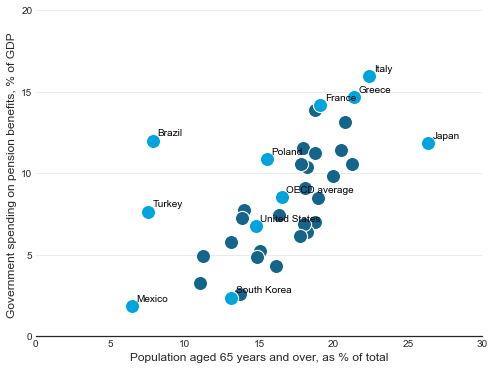

In [763]:
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=df_pension_b,
                x='Population aged 65 years and over, as % of total',
                y='Government spending on pension benefits, % of GDP ',
                s=200,
                color='#156489',
                ax=ax,
                zorder=2
               )

sns.scatterplot(data=df_pension_a,
                x='Population aged 65 years and over, as % of total',
                y='Government spending on pension benefits, % of GDP ',
                s=200,
                color='#00a4dc',
                ax=ax,
                zorder=2
               )

for i in range(df_pension_a.shape[0]):
    plt.text(x=df_pension_a['Population aged 65 years and over, as % of total'][i]+0.3,y=df_pension_a['Government spending on pension benefits, % of GDP '][i]+0.3,
             s=df_pension_a.Country[i], 
             fontdict=dict(color='black',size=10),
            )

sns.despine(left=True, bottom=False, right=True, top=True)

ax.set_xticks(np.arange(0, 35, 5))
ax.set_yticks(np.arange(0, 25, 5))

plt.grid(axis = 'y', alpha=0.5, zorder=1)

plt.show()

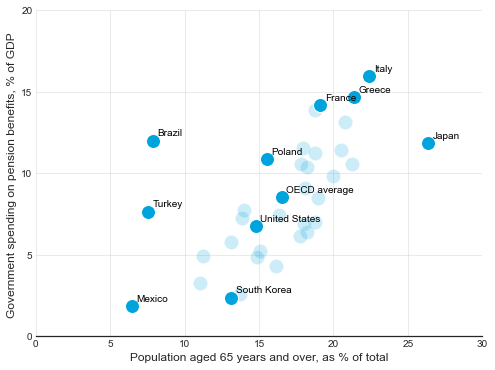

In [746]:
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=df_pension_b,
                x='Population aged 65 years and over, as % of total',
                y='Government spending on pension benefits, % of GDP ',
                s=200,
                color='#00a4dc',
                ax=ax,
                alpha=0.2,
                zorder=2
               )

sns.scatterplot(data=df_pension_a,
                x='Population aged 65 years and over, as % of total',
                y='Government spending on pension benefits, % of GDP ',
                s=200,
                color='#00a4dc',
                ax=ax,
                zorder=2
               )

for i in range(df_pension_a.shape[0]):
    plt.text(x=df_pension_a['Population aged 65 years and over, as % of total'][i]+0.3,y=df_pension_a['Government spending on pension benefits, % of GDP '][i]+0.3,
             s=df_pension_a.Country[i], 
             fontdict=dict(color='black',size=10),
            )

sns.despine(left=True, bottom=False, right=True, top=True)

ax.set_xticks(np.arange(0, 35, 5))
ax.set_yticks(np.arange(0, 25, 5))

plt.grid(alpha=0.5, zorder=1)

plt.show()

# Case 3 - Charts that conceal their point


- Kategori terakhir ini seringkali tidak terlihat jelas. Chart jenis ini tidak _misleading_ , tapi lebih membingungkan.


- Hal ini biasa terjadi saat kita ingin memuat terlalu banyak informasi di ruang yang sempit.

## Including too much detail


- Chart di bawah menunjukkan surplus budget Jerman dengan menunjukkan _budget balance_ dan _current-account balance_ dari 10 negara di area Euro.


- Karena terlalu banyak warna, agak susah untuk membedakan atau melihat nilainya karena terlalu kecil untuk dilihat.

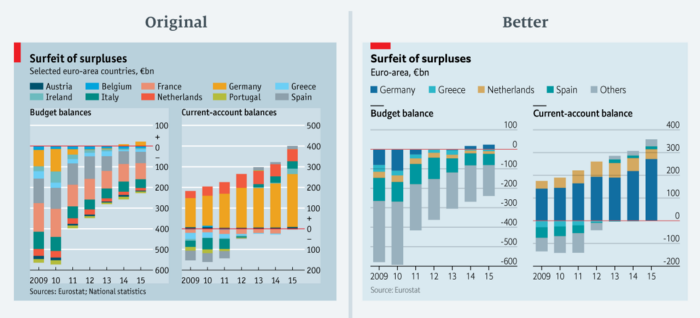

In [503]:
df_balance = pd.read_csv(r"data/Economist_eu-balance.csv", header=[0,1])
print(df_balance.shape)
df_balance

(19, 15)


Unnamed: 0_level_0 Current-account balance, euro million            \
              Country                                  2009      2010   
0             Belgium                               -3755.0    6441.0   
1             Germany                              141234.0  144890.0   
2             Estonia                                 360.0     266.0   
3             Ireland                               -7912.1   -2006.8   
4              Greece                              -29323.0  -25731.0   
5               Spain                              -46191.0  -42388.0   
6              France                              -10652.0  -12547.0   
7               Italy                              -29717.0  -54742.0   
8              Cyprus                               -1431.0   -2172.0   
9              Latvia                                1463.0     368.0   
10          Lithuania                                 385.3    -357.5   
11         Luxembourg                                2662.0    2682.0   
12              Malta                                -523.1    -414.5   
13        Netherlands                               33816.0   44503.0   
14            Austria                                7479.0    8447.0   
15           Portugal                              -18285.0  -18260.0   
16           Slovenia                                -203.0     -43.0   
17           Slovakia                               -2207.1   -3183.5   
18            Finland                                2964.0    2046.0   

                                                      \
        2011      2012      2013      2014      2015   
0    -4067.0    -210.0   -1247.0   -3482.0   -4199.0   
1   165077.0  193589.0  190091.0  218966.0  271402.0   
2      222.5    -349.6      98.5     161.7     381.0   
3    -2810.4   -4605.0    2787.0    2093.0   11556.0   
4   -20713.0   -7324.0   -3685.0   -2916.0   -1438.0   
5   -34040.0   -2404.0   15591.0   11217.0   12555.0   
6   -17690.0  -20151.0  -10797.0  -20553.0   -8090.0   
7   -49061.0   -5455.0   15847.0   30960.0   24412.0   
8     -811.0   -1162.0    -896.0    -760.0    -260.0   
9     -641.0    -794.0    -621.0    -411.0    -113.0   
10   -1423.4    -470.2     292.1    1157.7    -847.2   
11    2611.0    2489.0    2518.0    2569.0    2641.0   
12    -139.1     -29.4       9.8     493.6     226.6   
13   55912.0   66701.0   64403.0   56934.0   43421.0   
14    5057.0    4725.0    6294.0    8242.0    5940.0   
15  -10573.0   -3018.0    2689.0     141.0     210.0   
16      70.0     775.3    1593.9    2178.8    1760.1   
17   -3497.0     683.7    1379.0     870.5   -1391.1   
18   -3425.0   -4548.0   -4571.0   -3754.0   -1509.0   

   Budget balance, euro million                                         \
                           2009      2010      2011      2012     2013   
0                      -18775.1  -14609.1  -15898.7  -16409.4 -12281.4   
1                      -79590.0 -108904.0  -25863.0    -929.0  -3967.0   
2                        -308.9      27.6     193.1     -46.2    -32.2   
3                      -23467.0  -53712.1  -21876.6  -14114.3 -11026.6   
4                      -35966.0  -25309.0  -21280.0  -16951.0 -23765.0   
5                     -118194.0 -101404.0 -103214.0 -108847.0 -71687.0   
6                     -138934.0 -137410.0 -106104.0 -104043.0 -86468.0   
7                      -82548.0  -67573.1  -60231.0  -47078.0 -46893.0   
8                       -1014.7    -911.6   -1122.1   -1082.2   -930.8   
9                       -1711.2   -1545.1    -870.1    -265.9   -264.6   
10                      -2452.6   -1934.1   -2795.9   -1049.0   -912.4   
11                       -249.5    -264.5     221.4     152.2    453.6   
12                       -198.8    -158.0    -164.6    -250.0   -185.5   
13                     -31781.0  -33533.0  -28791.0  -25586.0 -19343.0   
14                     -15351.9  -13141.6   -7919.3   -6975.5  -6316.5   
15                     -17203.6  -

In [627]:
df_balance_account = df_balance.loc[:,['Unnamed: 0_level_0',('Current-account balance, euro million')]].copy()

df_balance_account.columns = df_balance_account.columns.droplevel()

df_balance_account = df_balance_account.melt(id_vars="Country", 
                                             var_name="Year", 
                                             value_name="Value")

df_balance_account["Value"] = df_balance_account["Value"] / 1000

df_balance_account = df_balance_account.set_index(['Country', 'Year']).unstack('Country')

df_balance_account.columns = df_balance_account.columns.droplevel()

df_balance_account

Country,Austria,Belgium,Cyprus,Estonia,Finland,France,Germany,Greece,Ireland,Italy,Latvia,Lithuania,Luxembourg,Malta,Netherlands,Portugal,Slovakia,Slovenia,Spain
Year,,,,,,,,,,,,,,,,,,,
2009,7.479,-3.755,-1.431,0.3600,2.964,-10.652,141.234,-29.323,-7.9121,-29.717,1.463,0.3853,2.662,-0.5231,33.816,-18.285,-2.2071,-0.2030,-46.191
2010,8.447,6.441,-2.172,0.2660,2.046,-12.547,144.890,-25.731,-2.0068,-54.742,0.368,-0.3575,2.682,-0.4145,44.503,-18.260,-3.1835,-0.0430,-42.388
2011,5.057,-4.067,-0.811,0.2225,-3.425,-17.690,165.077,-20.713,-2.8104,-49.061,-0.641,-1.4234,2.611,-0.1391,55.912,-10.573,-3.4970,0.0700,-34.040
2012,4.725,-0.210,-1.162,-0.3496,-4.548,-20.151,193.589,-7.324,-4.6050,-5.455,-0.794,-0.4702,2.489,-0.0294,66.701,-3.018,0.6837,0.7753,-2.404
2013,6.294,-1.247,-0.896,0.0985,-4.571,-10.797,190.091,-3.685,2.7870,15.847,-0.621,0.2921,2.518,0.0098,64.403,2.689,1.3790,1.5939,15.591
2014,8.242,-3.482,-0.760,0.1617,-3.754,-20.553,218.966,-2.916,2.0930,30.960,-0.411,1.1577,2.569,0.4936,56.934,0.141,0.8705,2.1788,11.217
2015,5.940,-4.199,-0.260,0.3810,-1.509,-8.090,271.402,-1.438,11.5560,24.412,-0.113,-0.8472,2.641,0.2266,43.421,0.210,-1.3911,1.7601,12.555


In [628]:
df_balance_budget = df_balance.loc[:,['Unnamed: 0_level_0',('Budget balance, euro million')]].copy()

df_balance_budget.columns = df_balance_budget.columns.droplevel()

df_balance_budget = df_balance_budget.melt(id_vars="Country", 
                                             var_name="Year", 
                                             value_name="Value")

df_balance_budget["Value"] = df_balance_budget["Value"] / 1000

df_balance_budget = df_balance_budget.set_index(['Country', 'Year']).unstack('Country')

df_balance_budget.columns = df_balance_budget.columns.droplevel()

df_balance_budget

Country,Austria,Belgium,Cyprus,Estonia,Finland,France,Germany,Greece,Ireland,Italy,Latvia,Lithuania,Luxembourg,Malta,Netherlands,Portugal,Slovakia,Slovenia,Spain
Year,,,,,,,,,,,,,,,,,,,
2009,-15.3519,-18.7751,-1.0147,-0.3089,-4.577,-138.934,-79.590,-35.966,-23.4670,-82.5480,-1.7112,-2.4526,-0.2495,-0.1988,-31.781,-17.2036,-4.9965,-2.1123,-118.194
2010,-13.1416,-14.6091,-0.9116,0.0276,-4.883,-137.410,-108.904,-25.309,-53.7121,-67.5731,-1.5451,-1.9341,-0.2645,-0.1580,-33.533,-20.1002,-5.0581,-2.0428,-101.404
2011,-7.9193,-15.8987,-1.1221,0.1931,-2.056,-106.104,-25.863,-21.280,-21.8766,-60.2310,-0.8701,-2.7959,0.2214,-0.1646,-28.791,-13.0061,-3.0207,-2.4617,-103.214
2012,-6.9755,-16.4094,-1.0822,-0.0462,-4.362,-104.043,-0.929,-16.951,-14.1143,-47.0780,-0.2659,-1.0490,0.1522,-0.2500,-25.586,-9.5291,-3.1589,-1.4588,-108.847
2013,-6.3165,-12.2814,-0.9308,-0.0322,-5.315,-86.468,-3.967,-23.765,-11.0266,-46.8930,-0.2646,-0.9124,0.4536,-0.1855,-19.343,-8.2452,-2.0174,-5.3194,-71.687
2014,-9.0920,-12.3970,-1.5774,0.1376,-6.597,-83.941,16.693,-6.355,-7.0450,-49.3400,-0.3523,-0.2265,0.6558,-0.1478,-14.452,-12.4023,-2.0561,-2.0717,-61.942
2015,-3.6019,-10.0758,-0.2362,0.0142,-5.783,-79.697,23.856,-9.941,-5.0141,-43.1530,-0.3314,-0.0974,0.6865,-0.0976,-13.970,-7.9178,-2.0269,-1.1038,-57.004


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


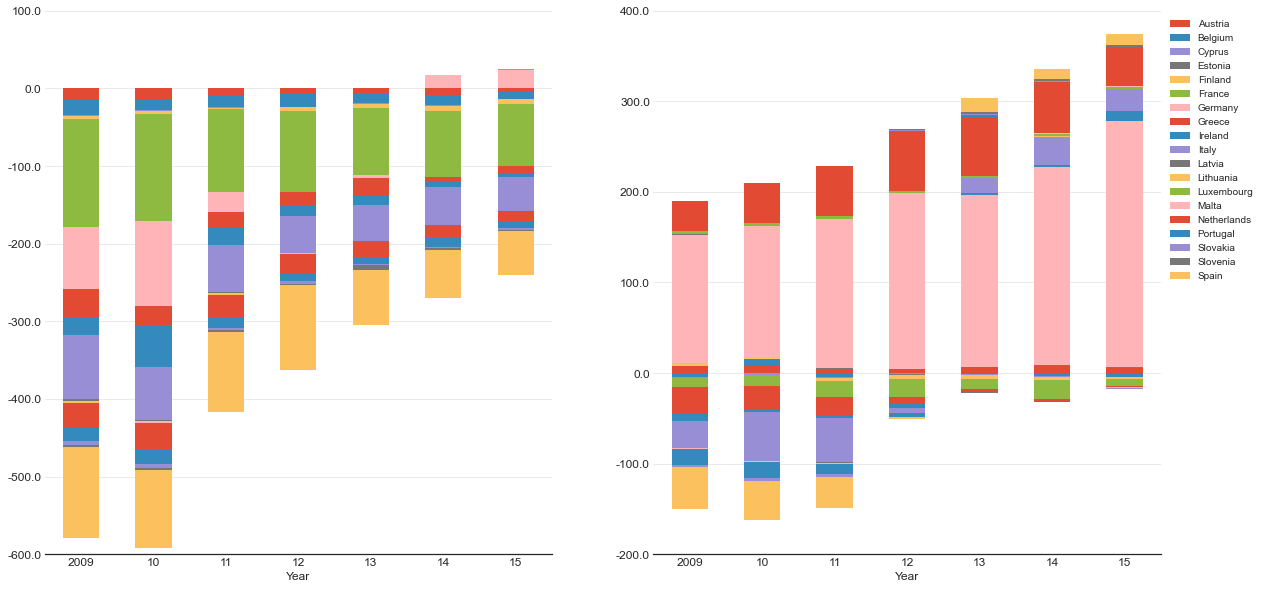

In [629]:
fig, ax = plt.subplots(1, 2)

df_balance_budget.plot(kind='bar', stacked=True, figsize=(20,10), ax=ax[0], legend=None)

df_balance_account.plot(kind='bar', stacked=True, figsize=(20,10), ax=ax[1])

# ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

ax[0].set_xticklabels(['2009', '10', '11', '12', '13', '14', '15'], rotation=0, size=12)
ax[1].set_xticklabels(['2009', '10', '11', '12', '13', '14', '15'], rotation=0, size=12)

ax[0].grid(axis='y', alpha=0.5, zorder=1)
ax[1].grid(axis='y', alpha=0.5, zorder=1)

ax[0].set_ylim([-600, 100])
ax[1].set_ylim([-200, 400])

ax[0].set_yticklabels(ax[0].get_yticks(), size=12)
ax[1].set_yticklabels(ax[1].get_yticks(), size=12)

sns.despine(left=True, bottom=False, right=True, top=True)

plt.show()

In [653]:
country_of_interest = ['Germany', 'Greece', 'Netherlands', 'Spain']

########################################

df_balance_budget = df_balance.loc[:,['Unnamed: 0_level_0',('Budget balance, euro million')]].copy()

df_balance_budget.columns = df_balance_budget.columns.droplevel()

df_balance_budget = df_balance_budget.melt(id_vars="Country", 
                                             var_name="Year", 
                                             value_name="Value")

df_balance_budget.loc[df_balance_budget['Country'].isin(country_of_interest), 'Country'] = df_balance_budget['Country']
df_balance_budget.loc[~df_balance_budget['Country'].isin(country_of_interest), 'Country'] = 'Other'

df_balance_budget["Value"] = df_balance_budget["Value"] / 1000

df_balance_budget = df_balance_budget.groupby(["Country", "Year"]).agg({'Value':'sum'})

df_balance_budget = df_balance_budget.unstack('Country')

df_balance_budget.columns = df_balance_budget.columns.droplevel()


########################################


df_balance_account = df_balance.loc[:,['Unnamed: 0_level_0',('Current-account balance, euro million')]].copy()

df_balance_account.columns = df_balance_account.columns.droplevel()

df_balance_account = df_balance_account.melt(id_vars="Country", 
                                             var_name="Year", 
                                             value_name="Value")

df_balance_account.loc[df_balance_account['Country'].isin(country_of_interest), 'Country'] = df_balance_account['Country']
df_balance_account.loc[~df_balance_account['Country'].isin(country_of_interest), 'Country'] = 'Other'

df_balance_account["Value"] = df_balance_account["Value"] / 1000

df_balance_account = df_balance_account.groupby(["Country", "Year"]).agg({'Value':'sum'})

df_balance_account = df_balance_account.unstack('Country')

df_balance_account.columns = df_balance_account.columns.droplevel()

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


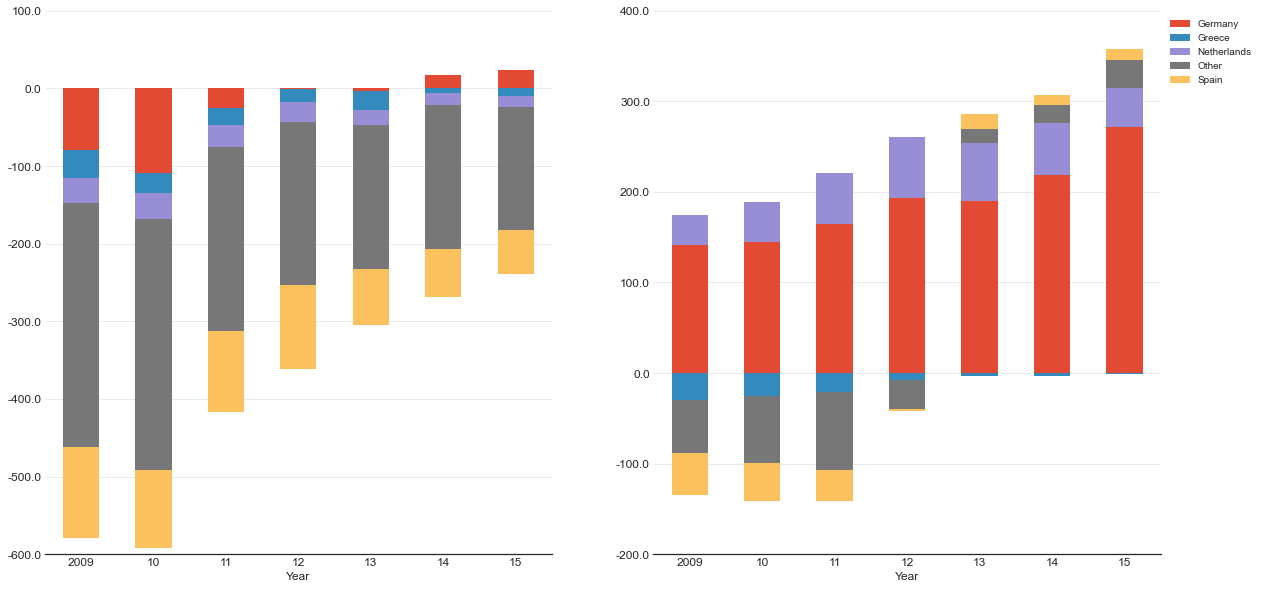

In [654]:
fig, ax = plt.subplots(1, 2)

df_balance_budget.plot(kind='bar', stacked=True, figsize=(20,10), ax=ax[0], legend=None)

df_balance_account.plot(kind='bar', stacked=True, figsize=(20,10), ax=ax[1])

# ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

ax[0].set_xticklabels(['2009', '10', '11', '12', '13', '14', '15'], rotation=0, size=12)
ax[1].set_xticklabels(['2009', '10', '11', '12', '13', '14', '15'], rotation=0, size=12)

ax[0].grid(axis='y', alpha=0.5, zorder=1)
ax[1].grid(axis='y', alpha=0.5, zorder=1)

ax[0].set_ylim([-600, 100])
ax[1].set_ylim([-200, 400])

ax[0].set_yticklabels(ax[0].get_yticks(), size=12)
ax[1].set_yticklabels(ax[1].get_yticks(), size=12)

sns.despine(left=True, bottom=False, right=True, top=True)

plt.show()

# Conclusion

- Ada 3 jenis visualisasi data yang kurang baik ditampilkan:
    1. Chart yang misleading,
    2. Chart yang membingungkan,
    3. Chart yang menutupi poin utama yang ingin disampaikan.


- Hal terbaik yang bisa dilakukan adalah _be aware_ , _be responsible_ , dan _be critical_ terhadap data dan visualisasi yang kita produksi.


- Selalu belajar dari kesalahan sendiri dan perbanyak referensi dari contoh produksi orang lain.

# End of Notebook